In [ ]:
# So, for numerical data, the data pre-processing involves:
# 1. Train and test data, combining test and test data.
# 2.Identifying duplicates in rows or columns.
# 3. NA treatment: High significant, Impute' Missng', low significant 'Mean imputation if median is ot whole number' or we can leave the less significacant data as is.
# 4. Identify dependent variable and Independent variable, if needed to convert categorical data, use Label encoding and then perform 
# 5. Data Transformation( Scaling): To reduce skewness, we have to reduce the skewness by using Minmax, Robust or standard Scaler. 
# 6. Once scaling is done, the data is cleaned (encoded and scaled data combined)
# 7. We will drop any added columns and then test and train test seperated and then will identify dependent variable.
# 8. If dependent variable still shows skewness we can apply other alorithms or we can start model building.

# Categorical: When the dependent variable in categorical, the pre-processing involves:
# 1. Clean rows and columns.
# 2. Fill NA's with imputations.
# Hypthesis testing.

# Hypothesis testing: Comparision of means or Averages of 2 Groups/Classes/Levels  or more than 2 Groups/Classes/Levels.
# So, in this cases, one variable is Numerical or categorical or both categorical variables.
# 1.Fundamental Assumption: Numerical variable is close to normal distirbution with minimum outliers and has no missing values.
# 2. Another Fundamental Assumption is that the means or average or Groups/Classes/Levels are different.
#Process:
# 1. Groupby- confirm mean differnece and also highlights many different Groups/Classes/Levels in categorical data.
# 2. Frame Null and Alternate Hypothesis.
# 3. Split data into as many as Groups/Classes/Levels.
# 4. Identify and conduct relevant hypothesis.
# 5. Interpretaion of test is based on P-value.

#If P is less than 0.05, rejects null hypthesis, P is the standard error or 95% confidence level.
# if P is grater than 0.05, will fail to reject the null hypothesis.

# If one variale numeric and other is categorical and has 2 Groups/Classes/Levels, we will do 2 sample T test.

In [2]:
# Null & Alternate Hypthesis
# Null: There is no significant difference in Averages. (Averages same as means) i.e., H0=mean1-mean2=0.
# Alternate: There is significant difference in Averages. (Averages same as means) i.e., H1=mean1-mean2!=0.

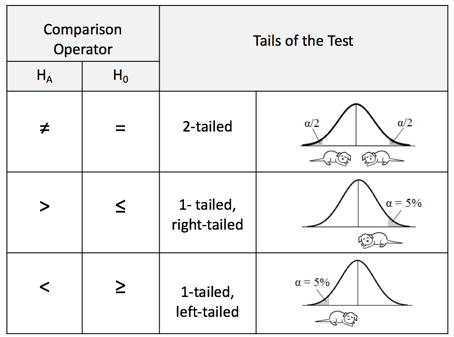

In [4]:
# for 2 sample Independent T test- Variance difference is also checked.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 
%matplotlib inline

In [70]:
import io
%cd "C:\Users\acers\Documents\Datasets"

C:\Users\acers\Documents\Datasets


In [71]:
df=pd.read_csv('day.csv')

In [72]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [74]:
df.shape

(731, 16)

In [75]:
df.season.value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [76]:
df.holiday.value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [77]:
df.mnth.value_counts().sort_values(ascending=False)

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [78]:
df.weathersit.value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [79]:
# Average casual on weekdays
df.casual.groupby(df.weekday).mean()

weekday
0    1338.295238
1     674.133333
2     556.182692
3     551.144231
4     590.961538
5     752.288462
6    1465.257143
Name: casual, dtype: float64

In [80]:
# Median cnt in differnet seasons
df.cnt.groupby(df.season).mean()

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [81]:
# No null values
df.isnull().sum().sort_values(ascending=False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

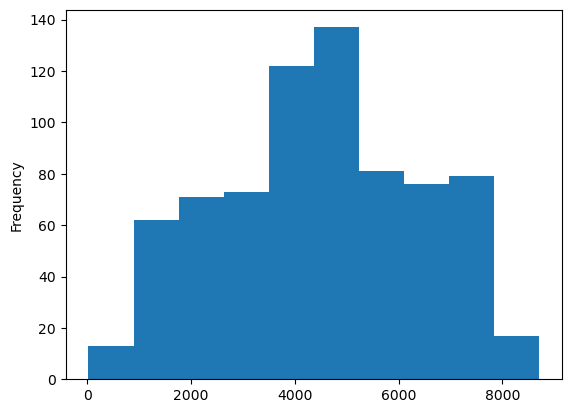

In [82]:
df.cnt.plot(kind='hist')
plt.show()

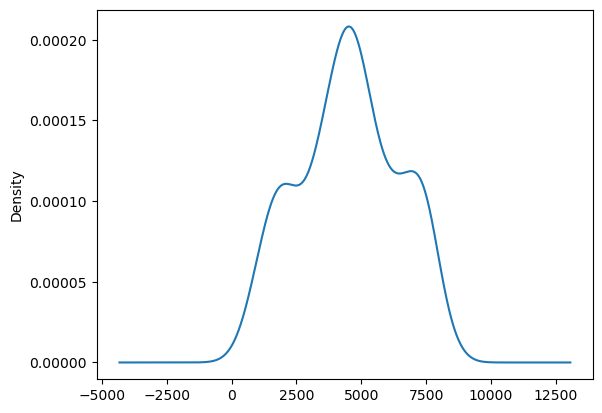

In [83]:
df.cnt.plot(kind='density')
plt.show()

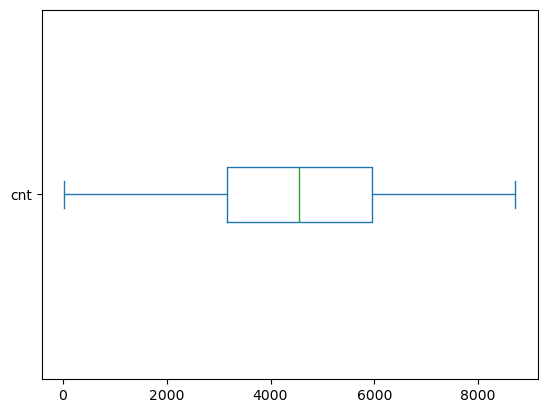

In [84]:
df.cnt.plot(kind='box',vert=False)
plt.show()

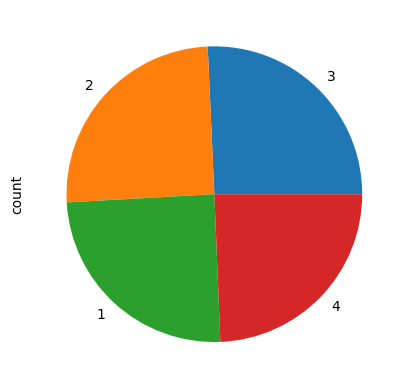

In [85]:
df.season.value_counts().plot(kind='pie')
plt.show()

In [86]:
# Cross Tabulation
pd.crosstab(df.holiday,df.season)

season,1,2,3,4
holiday,,,,
0,174,180,184,172
1,7,4,4,6


In [87]:
# Checing mean difference
df.cnt.groupby(df.holiday).mean()

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

In [89]:
# For 2 sample Independent T-Test, variance is also checked.
np.round(df.cnt.groupby(df.holiday).var(),2)

holiday
0    3721094.81
1    4424084.00
Name: cnt, dtype: float64

In [90]:
# Split data
holiday0=df[df.holiday==0]
holiday1=df[df.holiday!=0]

In [91]:
print(holiday0.shape)
print(holiday1.shape)

(710, 16)
(21, 16)


In [92]:
from scipy.stats import ttest_ind

In [93]:
ttest_ind(holiday0.cnt,holiday1.cnt,equal_var=False)
# P- value is greater, we fail to reject null hypothesis. So the means are equal or identical

TtestResult(statistic=np.float64(1.704685615800036), pvalue=np.float64(0.10299984047957059), df=np.float64(21.00711476803703))

In [94]:
# Test null on Windspeed and Holiday.
df.windspeed.groupby(df.holiday).mean()

holiday
0    0.190402
1    0.193319
Name: windspeed, dtype: float64

In [95]:
df.windspeed.groupby(df.holiday).var()

holiday
0    0.006005
1    0.006346
Name: windspeed, dtype: float64

In [96]:
# T-test
ttest_ind(holiday0.windspeed,holiday1.windspeed,equal_var=False)
# P value greater than 0.05, fail to reject null hypothesis.

TtestResult(statistic=np.float64(-0.16550270230269873), pvalue=np.float64(0.8701212295765679), df=np.float64(21.13471429619843))

In [97]:
# If we have more than 2 Groups or classes, we use one way Anova or Anova single factor.
# Assumptions: means are different and more than 2 classes.
# Null- there is no significant difference, means are same.
# Alternate: there is significant difference, means are not same.

In [98]:
df.cnt.groupby(df.season).mean()

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [99]:
# Split the data
spring=df[df.season==1]
fall=df[df.season==2]
summer=df[df.season==3]
winter=df[df.season==4]

In [100]:
print(spring.shape)
print(fall.shape)
print(summer.shape)
print(winter.shape)

(181, 16)
(184, 16)
(188, 16)
(178, 16)


In [61]:
from scipy.stats import f_oneway

In [101]:
f_oneway(spring.cnt,fall.cnt,summer.cnt,winter.cnt)
# reject null hypothesis.

F_onewayResult(statistic=np.float64(128.76962156570784), pvalue=np.float64(6.720391362913176e-67))

In [102]:
# test null if average windspeed in different seasons is equal.
df.windspeed.groupby(df.season).mean()

season
1    0.214537
2    0.203507
3    0.172095
4    0.171995
Name: windspeed, dtype: float64

In [104]:
f_oneway(spring.windspeed,fall.windspeed,summer.windspeed,winter.windspeed)
# P value is greater, reject null hypthesis.

F_onewayResult(statistic=np.float64(15.298612280751284), pvalue=np.float64(1.1612205094807604e-09))

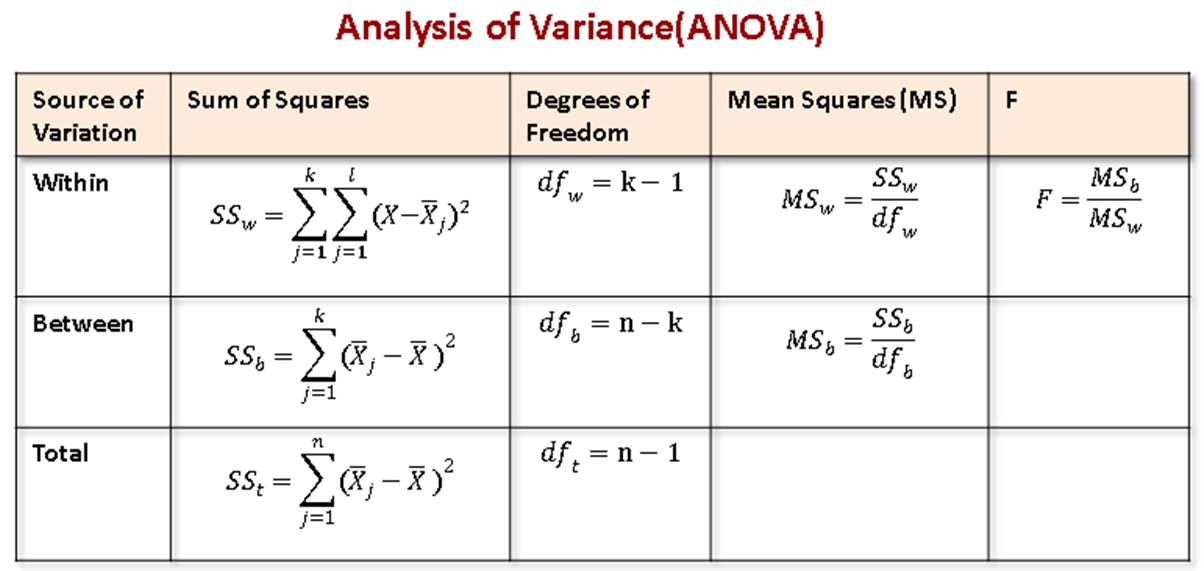

In [105]:
# Both variables are non numerical and categorical, we use chi square test of independence.
# Input of this test is cross tabulation.
# Null hypothesis: There is no association between the variables.
# Alternate Hypothesis: There is association between the variables.

In [106]:
# Test null, no association between season and weathersit
pd.crosstab(df.season,df.weathersit)

weathersit,1,2,3
season,,,
1,111,66,4
2,113,68,3
3,136,48,4
4,103,65,10


In [107]:
from scipy.stats import chi2_contingency

In [109]:
chi2_contingency(pd.crosstab(df.season,df.weathersit))
# Since p value is less than 0.05, reject null hupthesis.

Chi2ContingencyResult(statistic=np.float64(14.88388618977679), pvalue=np.float64(0.021179301044733697), dof=6, expected_freq=array([[114.64158687,  61.15868673,   5.1997264 ],
       [116.54172367,  62.17236662,   5.28590971],
       [119.0752394 ,  63.52393981,   5.40082079],
       [112.74145007,  60.14500684,   5.11354309]]))

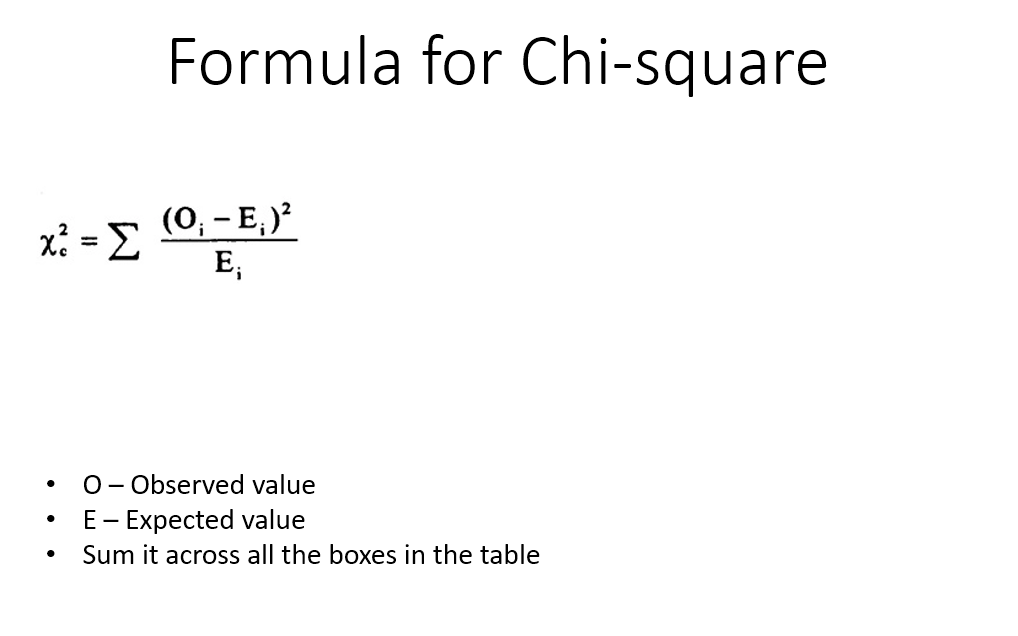

In [110]:
# test null, no association between weekday and working day
pd.crosstab(df.weekday,df.workingday)

workingday,0,1
weekday,,
0,105,0
1,15,90
2,1,103
3,1,103
4,2,102
5,2,102
6,105,0


In [112]:
chi2_contingency(pd.crosstab(df.weekday,df.workingday))
# P value is less, reject null hypothesis.

Chi2ContingencyResult(statistic=np.float64(644.2022437324581), pvalue=np.float64(6.775030505809736e-136), dof=6, expected_freq=array([[33.18057456, 71.81942544],
       [33.18057456, 71.81942544],
       [32.86456908, 71.13543092],
       [32.86456908, 71.13543092],
       [32.86456908, 71.13543092],
       [32.86456908, 71.13543092],
       [33.18057456, 71.81942544]]))

In [113]:
# Paired sample Ttest or Related sample T test.
# Data will be in the form of before and after an event, data comes at single entity but at 2 time Intervals.
# Null hypthesis: There is no significant difference in average variable before and after the event.
# Alternate: There is significant difference in average variable before and after the event.


In [114]:
# Test null before and after CPI Inflation before & after  demonitization equal.
beforedemon=[3.35,4.20,5.15,6.32,5.34,5.25,5.67,5.09,6.25,6.72 ]
afterdemom=[2.30,2.42,1.86,2.37,2.39,1.01,1.09,1.79,1.58,3.24]

In [ ]:
![image.png](attachment:6bbafdd4-3dd8-4b45-9cb9-4066fece8d56.png)

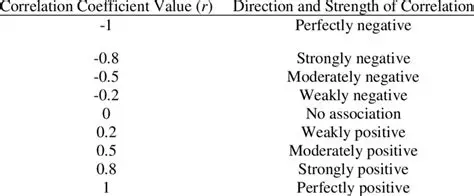

In [161]:
# Co variance
df[['cnt','windspeed']].cov()

,cnt,windspeed
cnt,3.752788e+06,-35.212185
windspeed,-3.521218e+01,0.006006


In [162]:
# Co variance
df[['cnt','windspeed','temp']].cov()

,cnt,windspeed,temp
cnt,3.752788e+06,-35.212185,222.514700
windspeed,-3.521218e+01,0.006006,-0.002241
temp,2.225147e+02,-0.002241,0.033508


In [163]:
# correlation
df[['cnt','windspeed','temp']].corr()

,cnt,windspeed,temp
cnt,1.000000,-0.234545,0.627494
windspeed,-0.234545,1.000000,-0.157944
temp,0.627494,-0.157944,1.000000


In [164]:
# Bivariate plot-Scatter plot- Linear relationship between two variables.

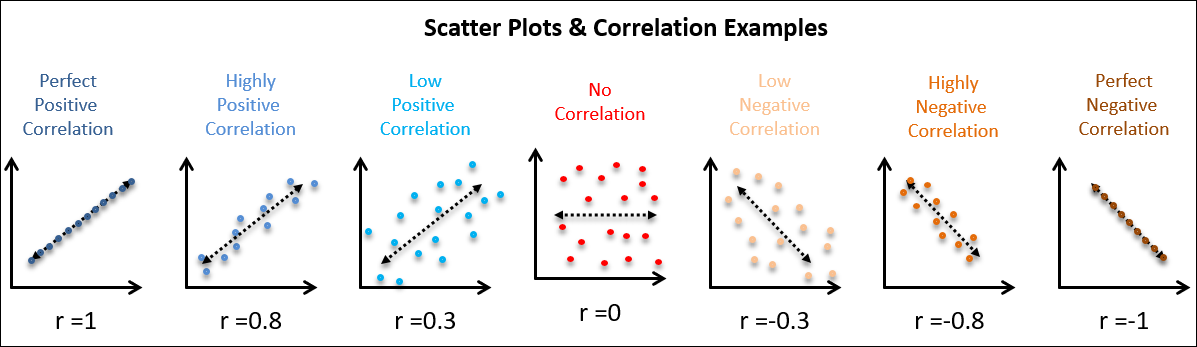

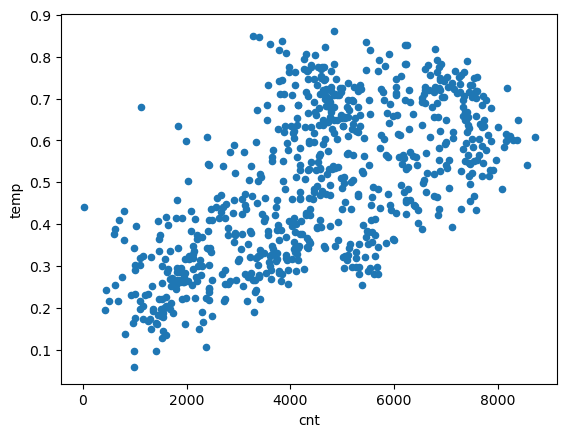

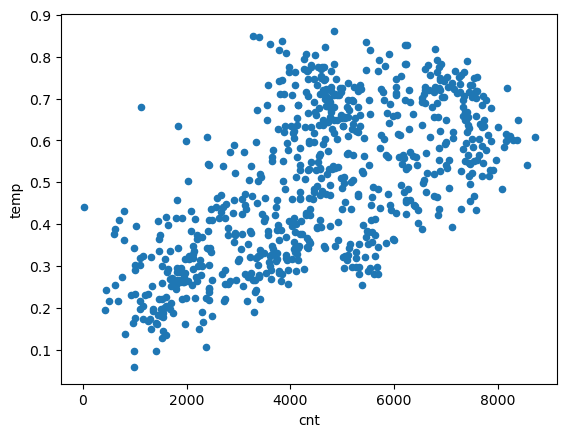

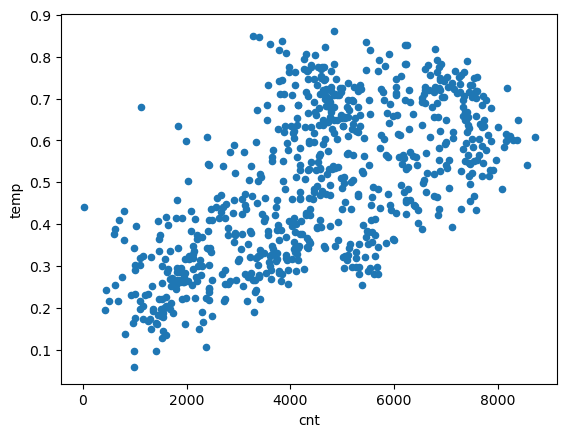

In [168]:
df.plot(x='cnt',y='temp',kind='scatter')
plt.show()

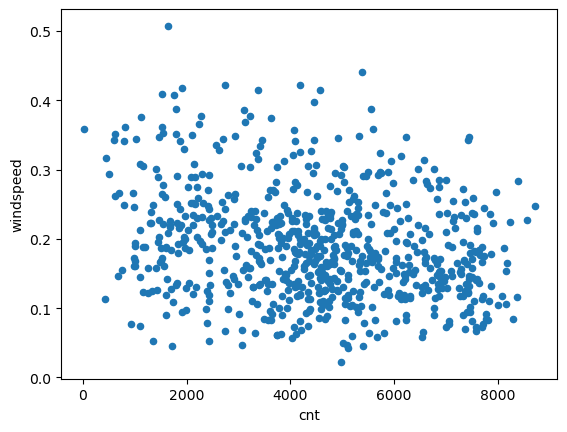

In [169]:
df.plot(x='cnt',y='windspeed',kind='scatter')
plt.show()

In [170]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [171]:
df[['cnt','casual','registered', 'windspeed','temp','atemp','hum']].corr()

,cnt,casual,registered,windspeed,temp,atemp,hum
cnt,1.000000,0.672804,0.945517,-0.234545,0.627494,0.631066,-0.100659
casual,0.672804,1.000000,0.395282,-0.167613,0.543285,0.543864,-0.077008
registered,0.945517,0.395282,1.000000,-0.217449,0.540012,0.544192,-0.091089
windspeed,-0.234545,-0.167613,-0.217449,1.000000,-0.157944,-0.183643,-0.248489
temp,0.627494,0.543285,0.540012,-0.157944,1.000000,0.991702,0.126963
atemp,0.631066,0.543864,0.544192,-0.183643,0.991702,1.000000,0.139988
hum,-0.100659,-0.077008,-0.091089,-0.248489,0.126963,0.139988,1.000000


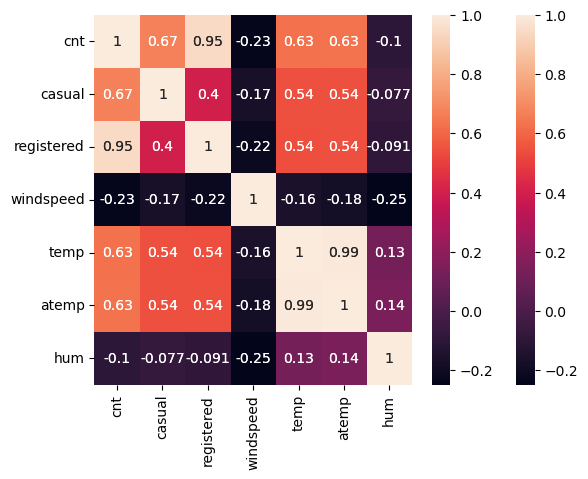

In [176]:
import seaborn as sns
sns.heatmap(df[['cnt','casual','registered', 'windspeed','temp','atemp','hum']].corr(),annot=True)
plt.show()

In [115]:
print(np.mean(beforedemon))
print(np.mean(afterdemom))

5.3340000000000005
2.0050000000000003


In [116]:
from scipy.stats import ttest_rel

In [120]:
ttest_rel(beforedemon,afterdemom)
#P is leass than 0.05, reject null hypthesis

TtestResult(statistic=np.float64(8.99004383308062), pvalue=np.float64(8.61570406430358e-06), df=np.int64(9))

In [121]:
# let's take bank data

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
%matplotlib inline

In [125]:
import io
%cd "C:\Users\acers\Documents\Datasets"

C:\Users\acers\Documents\Datasets


In [152]:
Data=pd.read_csv("bank-full.csv")

In [153]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [154]:
Data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [155]:
Data.tail()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."
41187,"74;""retired"";""married"";""professional.course"";""..."


In [156]:
Data.dtypes

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"    object
dtype: object

In [157]:
Data.shape

(41188, 1)

In [158]:
Data.columns

Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')

In [159]:
Data.describe()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
count,41188
unique,41176
top,"36;""retired"";""married"";""unknown"";""no"";""no"";""no..."
freq,2


Account Balance
7496.59    2
260.43     2
1478.51    2
2785.56    2
814.20     2
          ..
5564.12    1
2625.13    1
2732.76    1
3006.01    1
2082.67    1
Name: count, Length: 4991, dtype: int64

In [142]:
Data['Loan Term'].value_counts().sort_values(ascending=True)

Loan Term
12     943
36     981
24    1004
60    1035
48    1037
Name: count, dtype: int64

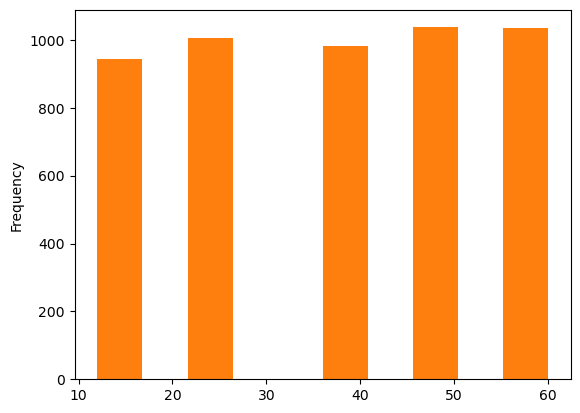

In [144]:
Data['Loan Term'].plot(kind='hist')
plt.show()

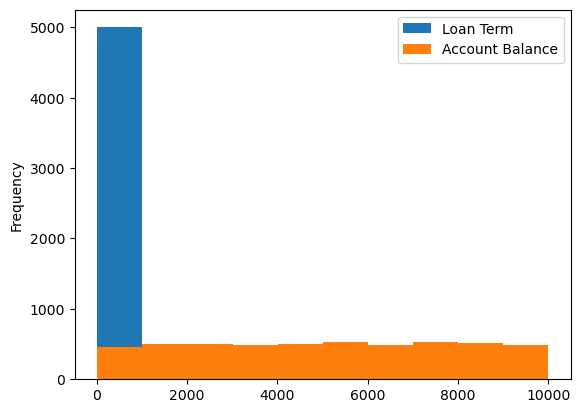

In [146]:
Data[['Loan Term','Account Balance']].plot(kind='hist')
plt.show()

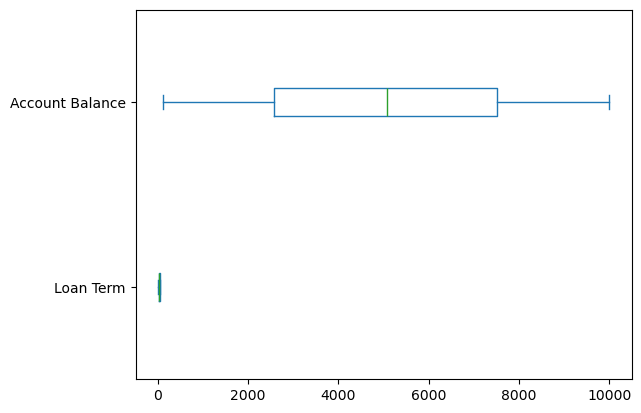

In [148]:
Data[['Loan Term','Account Balance']].plot(kind='box',vert=False)
plt.show()

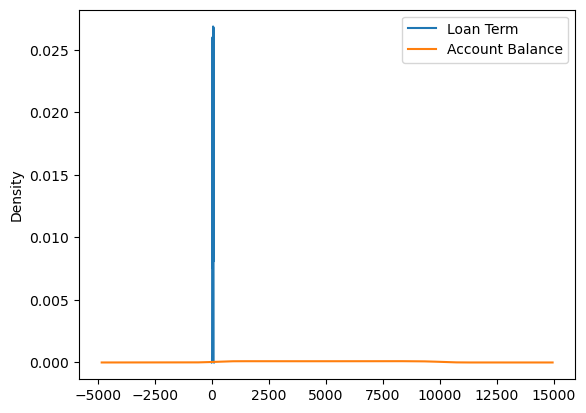

In [149]:
Data[['Loan Term','Account Balance']].plot(kind='density')
plt.show()